<a href="https://colab.research.google.com/github/HemantRajSingh/MovieMatch/blob/master/ExploratoryData_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#setup
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
data_files=[]
for i in range(2000,2024):
    #file_name= '../data/raw/movie_list_'+str( i)+'.csv'
    file_name= 'movie_list_'+str( i)+'.csv'
    data_files.append(file_name)
data_files


['movie_list_2000.csv',
 'movie_list_2001.csv',
 'movie_list_2002.csv',
 'movie_list_2003.csv',
 'movie_list_2004.csv',
 'movie_list_2005.csv',
 'movie_list_2006.csv',
 'movie_list_2007.csv',
 'movie_list_2008.csv',
 'movie_list_2009.csv',
 'movie_list_2010.csv',
 'movie_list_2011.csv',
 'movie_list_2012.csv',
 'movie_list_2013.csv',
 'movie_list_2014.csv',
 'movie_list_2015.csv',
 'movie_list_2016.csv',
 'movie_list_2017.csv',
 'movie_list_2018.csv',
 'movie_list_2019.csv',
 'movie_list_2020.csv',
 'movie_list_2021.csv',
 'movie_list_2022.csv',
 'movie_list_2023.csv']

In [11]:
df = pd.concat(map(pd.read_csv,data_files), ignore_index=True)
#df=pd.read_csv('wiki_movies.csv')
df.tail(5)

,Unnamed: 0,Movie Title,Plot Summary,Cover Image,Year,Source
6090,331,Memory (2023 film),"Sylvia, a single mother, social worker, and re...",upload.wikimedia.org/wikipedia/en/thumb/4/4e/M...,2023,https://en.wikipedia.org//wiki/Memory_(2023_film)
6091,332,The Color Purple (2023 film),"In 1909 Georgia, teenager Celie Harris lives w...",upload.wikimedia.org/wikipedia/en/thumb/7/70/C...,2023,https://en.wikipedia.org//wiki/The_Color_Purpl...
6092,333,The Boys in the Boat (film),The film's plot centres on the University of W...,upload.wikimedia.org/wikipedia/en/thumb/6/63/B...,2023,https://en.wikipedia.org//wiki/The_Boys_in_the...
6093,334,Ferrari (2023 film),"In the summer of 1957, Italian entrepreneur En...",upload.wikimedia.org/wikipedia/en/thumb/f/f6/F...,2023,https://en.wikipedia.org//wiki/Ferrari_(2023_f...
6094,335,Good Grief (film),"In London, Marc enjoys a Christmas party with ...",upload.wikimedia.org/wikipedia/en/thumb/1/14/G...,2023,https://en.wikipedia.org//wiki/Good_Grief_(film)


# Understanding data

In [12]:
df.shape #getting the rows and columns of dataset

(6095, 6)

In [13]:
df_2023= df[df['Year']==2023] # creating a new dataframe of year 2023

In [14]:
df_2023.shape #getting rows and columns for year 2023


(336, 6)

In [ ]:
df['Plot Summary'][0]

"After the kind-hearted but clumsy Super Dave Osborne (Bob Einstein) survives a near-fatal accident, he discovers his manager has embezzled from him. This forces him into bankruptcy and causes him to lose his house. Super Dave decides to retire from stunt work, but ends up meeting a single mother named Sandy (Gia Carides). When Super Dave learns that Sandy's son, Timmy (Carl Michael Lindner) needs an expensive heart surgery, Super Dave comes out of retirement to raise the money. In the process, he must face off against his arch-enemy, Gil Ruston (Dan Hedaya).\n"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6095 entries, 0 to 6094
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    6095 non-null   int64 
 1   Movie Title   6095 non-null   object
 2   Plot Summary  5556 non-null   object
 3   Cover Image   5990 non-null   object
 4   Year          6095 non-null   int64 
 5   Source        6095 non-null   object
dtypes: int64(2), object(4)
memory usage: 285.8+ KB


In [ ]:
df['Year'].value_counts() # count of movies in each year


2009    388
2021    363
2010    338
2023    336
2022    312
2012    281
2008    278
2020    275
2007    262
2019    244
2018    241
2000    237
2017    237
2003    231
2014    229
2013    228
2002    217
2011    214
2006    212
2001    211
2015    200
2004    198
2005    187
2016    176
Name: Year, dtype: int64

In [ ]:
df['Year'].unique() #unique values for year column

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [ ]:
df['Year'].nunique()  #total count of years

24

In [ ]:
df.isna().sum() # total num of null values

Unnamed: 0        0
Movie Title       0
Plot Summary    539
Cover Image     105
Year              0
Source            0
dtype: int64

There are 539 null values ofr plot summary in our data


# Exploratory Data Analysis
-Character count
-Word count
-Mean word length
-Mean sentence length

In [15]:
length = len(df['Plot Summary'][0])
length

565

The length of our sample review is 565

In [16]:
df['Length'] = df['Plot Summary'].str.len()


In [17]:
df['Length'].describe()

count     5556.000000
mean      3406.812635
std       1313.911990
min         68.000000
25%       2837.750000
50%       3633.000000
75%       4115.000000
max      22275.000000
Name: Length, dtype: float64

In [18]:
#word_count
def word_count(review):
    review= str(review)
    review_list = review.split()
    return len(review_list)

df['word_count'] = df['Plot Summary'].apply(word_count)
df['word_count'].describe()

count    6095.000000
mean      529.773421
std       271.144101
min         1.000000
25%       415.500000
50%       603.000000
75%       690.000000
max      3764.000000
Name: word_count, dtype: float64

# Corpus

In [19]:
def corpus(text):
    text_str=str(text)
    text_list = text_str.split()
    return text_list

In [20]:

corpus(df['Plot Summary'][0])

['After',
 'the',
 'kind-hearted',
 'but',
 'clumsy',
 'Super',
 'Dave',
 'Osborne',
 '(Bob',
 'Einstein)',
 'survives',
 'a',
 'near-fatal',
 'accident,',
 'he',
 'discovers',
 'his',
 'manager',
 'has',
 'embezzled',
 'from',
 'him.',
 'This',
 'forces',
 'him',
 'into',
 'bankruptcy',
 'and',
 'causes',
 'him',
 'to',
 'lose',
 'his',
 'house.',
 'Super',
 'Dave',
 'decides',
 'to',
 'retire',
 'from',
 'stunt',
 'work,',
 'but',
 'ends',
 'up',
 'meeting',
 'a',
 'single',
 'mother',
 'named',
 'Sandy',
 '(Gia',
 'Carides).',
 'When',
 'Super',
 'Dave',
 'learns',
 'that',
 "Sandy's",
 'son,',
 'Timmy',
 '(Carl',
 'Michael',
 'Lindner)',
 'needs',
 'an',
 'expensive',
 'heart',
 'surgery,',
 'Super',
 'Dave',
 'comes',
 'out',
 'of',
 'retirement',
 'to',
 'raise',
 'the',
 'money.',
 'In',
 'the',
 'process,',
 'he',
 'must',
 'face',
 'off',
 'against',
 'his',
 'arch-enemy,',
 'Gil',
 'Ruston',
 '(Dan',
 'Hedaya).']

In [21]:
df['review_list'] = df['Plot Summary'].apply(corpus)
df['review_list'][:5]

0    [After, the, kind-hearted, but, clumsy, Super,...
1    [After, finding, out, Deebo, escaped, prison, ...
2    [Aging, prizefighters, and, longtime, best, fr...
3    [Supernova, chronicles, the, search-and-rescue...
4    [In, Boston,, Irish, American, fraternal, twin...
Name: review_list, dtype: object

In [22]:
from tqdm import trange
corpus = []

for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['review_list'][i]


len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 6095/6095 [00:00<00:00, 71267.87it/s]


3228969

In [23]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('the', 167831),
 ('to', 123947),
 ('and', 117943),
 ('a', 84278),
 ('of', 50608),
 ('his', 46381),
 ('is', 45905),
 ('in', 43424),
 ('her', 38144),
 ('with', 35266)]

In [24]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

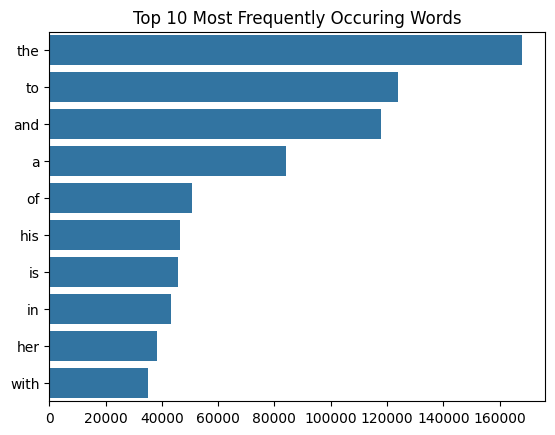

In [25]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

# ngramns

In [26]:
df.dropna(inplace=True)

In [27]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Plot Summary'])


In [28]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

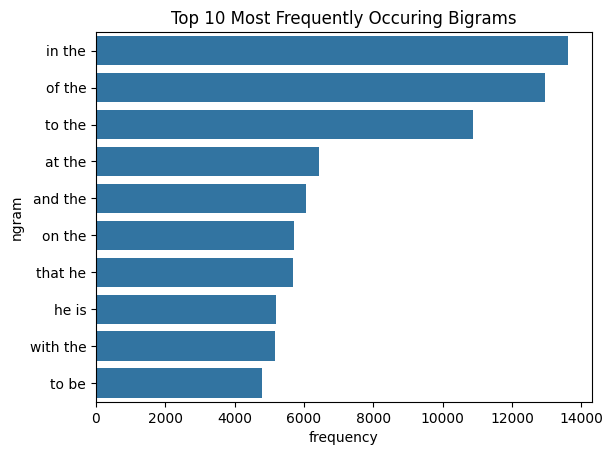

In [29]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [31]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['Plot Summary'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

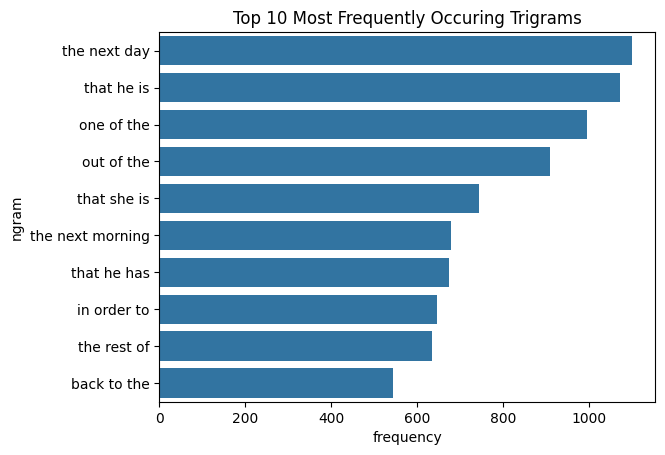

In [32]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()